<a href="https://colab.research.google.com/github/mh-fahim757/Predicting-Student-Depression-Using-Machine-Learning-A-Comparative-Study-of-Classification-Models/blob/main/437_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Importing dataset

In [ ]:
df = pd.read_csv('/content/Student_depression_dataset.csv')

## Dataset Description

In [ ]:
# features
print(f'Total fetures: {df.shape[1] - 1}')

# Regression or classification
print('This is a classification problem. Because we only need to evaluate whether a student has depression or not.')

# Data points
print(f'Total data points: {df.shape[0]}')

# Type of feature
print(set(df.dtypes))

Total fetures: 17
This is a classification problem. Because we only need to evaluate whether a student has depression or not.
Total data points: 27901
{dtype('O'), dtype('int64'), dtype('float64')}


Imbalanced dataset

In [ ]:
df['Depression'].value_counts()

,count
Depression,
1,16336
0,11565


Bar chart

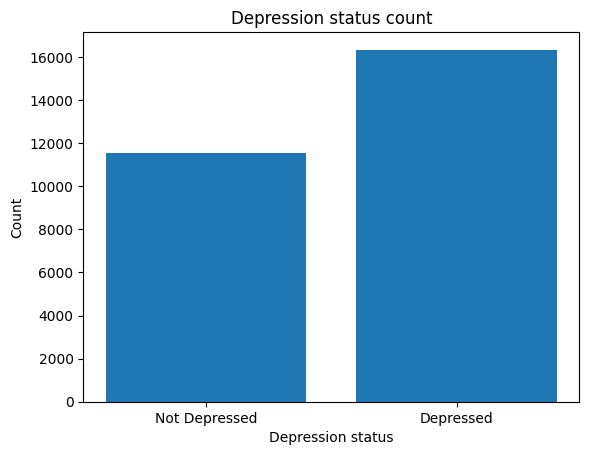

In [ ]:
depression_counts = df['Depression'].value_counts()
plt.bar(depression_counts.index, depression_counts.values)
plt.xlabel('Depression status')
plt.ylabel('Count')
plt.title('Depression status count')
plt.xticks(ticks=[0, 1], labels=['Not Depressed', 'Depressed'])
plt.show()

## Data pre-processing

checking the null values

In [ ]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,84
Study Satisfaction,0
Job Satisfaction,4700


### Dropping columns

We will drop the ID, and Profession column.

The ID does not serve any useful purpose for our model training as it's a unique value for each student.

The profession does not serve any useful purpose for our model because since it's a student dataset, the profession of all the students is 'student'. Although a few students have different profession, that ultimately creates outlier in the dataset.

In [ ]:
# drop the columns id, Profession
df = df.drop(['id', 'Profession'], axis = 1)

### Dropping null values

We can see that there are very few null values in CGPA, and Financial Stress column

In [ ]:
# dropping rows of CGPA that have null values
df = df.dropna(axis = 0, subset = ['CGPA'])

# # dropping rows of Job Satisfaction that have null values
# df = df.dropna(axis = 0, subset = ['Job Satisfaction'])

# dropping rows of Financial Stress that have null values
df = df.dropna(axis = 0, subset = ['Financial Stress'])

NameError: name 'df' is not defined

In [ ]:
# checking the shape after dropping null values
df.shape

(27738, 16)

### Imputing values

In the 'Job Staisfaction' column, there are a lot of null values

In [ ]:
df_job_none = df[df['Job Satisfaction'].isnull()]
df_job_none

,Gender,Age,City,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
1,Female,24.0,Bangalore,2.0,0.0,5.90,5.0,NaN,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
21,Male,29.0,Kolkata,3.0,0.0,6.73,3.0,NaN,7-8 hours,Moderate,M.Tech,No,0.0,1.0,No,0
24,Male,18.0,Bangalore,4.0,0.0,7.10,3.0,NaN,More than 8 hours,Unhealthy,Class 12,Yes,11.0,5.0,Yes,1
25,Female,20.0,Mumbai,5.0,0.0,8.58,5.0,NaN,7-8 hours,Moderate,Class 12,No,2.0,2.0,Yes,1
29,Male,28.0,Kalyan,3.0,0.0,9.86,3.0,NaN,7-8 hours,Unhealthy,M.Pharm,Yes,11.0,2.0,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27886,Female,22.0,Jaipur,5.0,0.0,9.25,4.0,NaN,More than 8 hours,Unhealthy,BBA,Yes,8.0,3.0,No,1
27889,Male,33.0,Ahmedabad,1.0,0.0,5.70,2.0,NaN,Less than 5 hours,Healthy,MCA,Yes,2.0,2.0,No,0
27891,Female,28.0,Thane,4.0,0.0,7.77,3.0,NaN,Less than 5 hours,Unhealthy,MSc,No,2.0,5.0,No,1
27893,Female,24.0,Hyderabad,3.0,0.0,6.02,2.0,NaN,7-8 hours,Moderate,B.Arch,No,8.0,2.0,No,0


In [ ]:
df_job_none['Work Pressure'].value_counts()

,count
Work Pressure,
0.0,4670


From the above code, we can see that Job satisfaction is null only when the Work pressure is 0 indicating that in the case of Job satisfaction being a null value, a student doesn't have a job

Imputing the values with 0

In [ ]:
df.fillna(0, inplace=True)
df.head()


,Gender,Age,City,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,1.0,8.97,2.0,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,3.0,2.0,7.03,5.0,4.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,3.0,2.0,5.59,2.0,1.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,4.0,4.0,8.13,3.0,5.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


### Encoding

#### Binary encoding

In [ ]:
binary_enc = LabelEncoder()
columns_to_encode = ['Gender', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
for column in columns_to_encode:
    df[column] = binary_enc.fit_transform(df[column])

In [ ]:
df.head()

,Gender,Age,City,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,33.0,Visakhapatnam,5.0,1.0,8.97,2.0,2.0,5-6 hours,Healthy,B.Pharm,1,3.0,1.0,0,1
1,0,24.0,Bangalore,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,0,3.0,2.0,1,0
2,1,31.0,Srinagar,3.0,2.0,7.03,5.0,4.0,Less than 5 hours,Healthy,BA,0,9.0,1.0,1,0
3,0,28.0,Varanasi,3.0,2.0,5.59,2.0,1.0,7-8 hours,Moderate,BCA,1,4.0,5.0,1,1
4,0,25.0,Jaipur,4.0,4.0,8.13,3.0,5.0,5-6 hours,Moderate,M.Tech,1,1.0,1.0,0,0


#### One hot encoding

In [ ]:
# One hot encoding
categories = ['City', 'Degree']
# for category in categories:
#     df[category] = df[category].astype('category')
df = pd.get_dummies(df, columns = categories, dtype = int)

In [ ]:
df.shape

(27738, 94)

In [ ]:
df.head()

,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,...,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD
0,1,33.0,5.0,1.0,8.97,2.0,2.0,5-6 hours,Healthy,1,...,0,0,0,0,0,0,0,0,0,0
1,0,24.0,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,0,...,0,0,0,0,0,0,0,0,0,0
2,1,31.0,3.0,2.0,7.03,5.0,4.0,Less than 5 hours,Healthy,0,...,0,0,0,0,0,0,0,0,0,0
3,0,28.0,3.0,2.0,5.59,2.0,1.0,7-8 hours,Moderate,1,...,0,0,0,0,0,0,0,0,0,0
4,0,25.0,4.0,4.0,8.13,3.0,5.0,5-6 hours,Moderate,1,...,0,0,0,0,0,0,0,0,0,0


### Mapping values for ranking columns

In [ ]:
# Sleep Duration
df['Sleep Duration'].value_counts()

,count
Sleep Duration,
Less than 5 hours,8256
7-8 hours,7313
5-6 hours,6140
More than 8 hours,6011
Others,18


Removing 'Others' due to very low counts.

In [ ]:
df = df[df['Sleep Duration'] != 'Others']

In [ ]:
df['Sleep Duration'] = df['Sleep Duration'].map({
    '7-8 hours' : 4,
    '5-6 hours' : 3,
    'More than 8 hours' : 2,
    'Less than 5 hours' : 1
})

In [ ]:
# Dietary Habits
df['Dietary Habits'].value_counts()

,count
Dietary Habits,
Unhealthy,10245
Moderate,9849
Healthy,7614
Others,12


Removing 'Others' due to very low counts.

In [ ]:
df = df[df['Dietary Habits'] != 'Others']

In [ ]:
df['Dietary Habits'] = df['Dietary Habits'].map({
    'Healthy' : 3,
    'Moderate' : 2,
    'Unhealthy' : 1
})

<ipython-input-26-4353e580010a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dietary Habits'] = df['Dietary Habits'].map({


In [ ]:
df.head()

,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,...,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD
0,1,33.0,5.0,1.0,8.97,2.0,2.0,3,3,1,...,0,0,0,0,0,0,0,0,0,0
1,0,24.0,2.0,0.0,5.90,5.0,0.0,3,2,0,...,0,0,0,0,0,0,0,0,0,0
2,1,31.0,3.0,2.0,7.03,5.0,4.0,1,3,0,...,0,0,0,0,0,0,0,0,0,0
3,0,28.0,3.0,2.0,5.59,2.0,1.0,4,2,1,...,0,0,0,0,0,0,0,0,0,0
4,0,25.0,4.0,4.0,8.13,3.0,5.0,3,2,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(27708, 94)

### Correlation

In [ ]:
print(set(df.dtypes))

{dtype('int64'), dtype('float64')}


<Axes: >

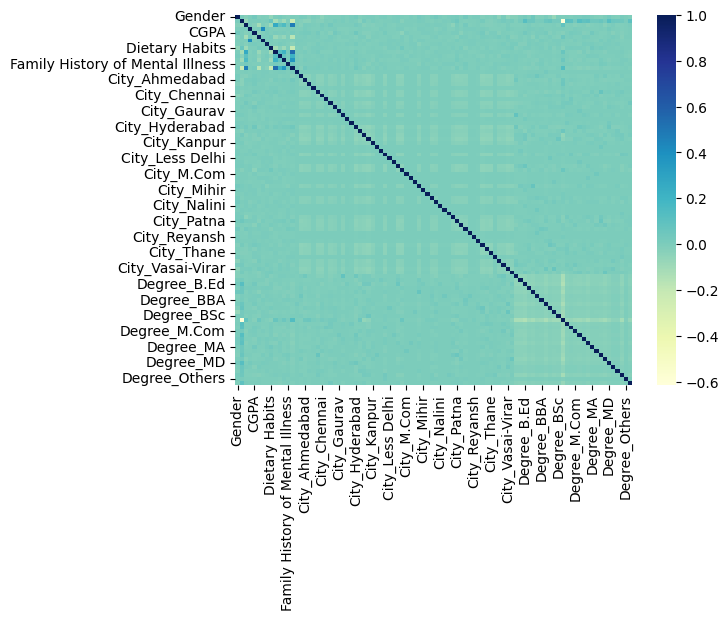

In [ ]:
df_corr = df.corr()
sns.heatmap(df_corr, cmap = 'YlGnBu')

### Split into train and test dataset

In [ ]:
x = df.drop('Depression', axis = 1)
y = df['Depression']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify = y, random_state=42)

### feature scaling

In [ ]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.fit_transform(x_test)

## Applying ML

### Logistic Regression

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

y_pred = logistic_model.predict(X_test_scaled)

Accuracy

In [ ]:
# accuracy
logistic_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", logistic_accuracy)

Accuracy: 0.841453145675448


Confusion matrix

In [ ]:
# confusion matrix
logistic_cm = confusion_matrix(y_test, y_pred)
print('confusion matrix:')
print(logistic_cm)

confusion matrix:
[[2686  761]
 [ 557 4309]]


Visualize Confusion matrix

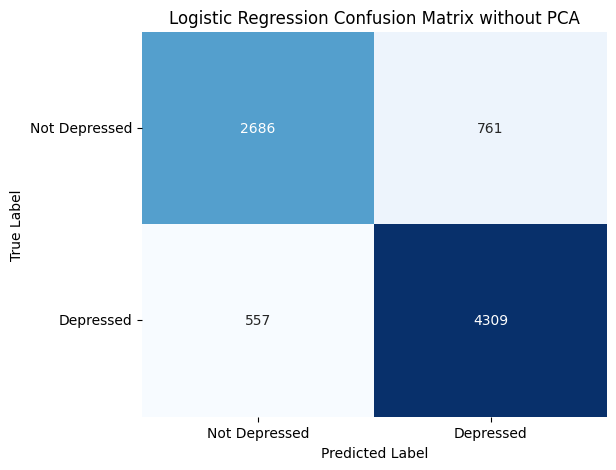

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(logistic_cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Logistic Regression Confusion Matrix without PCA')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0.5, 1.5], ['Not Depressed', 'Depressed'])
plt.yticks([0.5, 1.5], ['Not Depressed', 'Depressed'], rotation=0)

plt.show()

Classification report

In [ ]:
logistic_class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(logistic_class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      3447
           1       0.85      0.89      0.87      4866

    accuracy                           0.84      8313
   macro avg       0.84      0.83      0.84      8313
weighted avg       0.84      0.84      0.84      8313



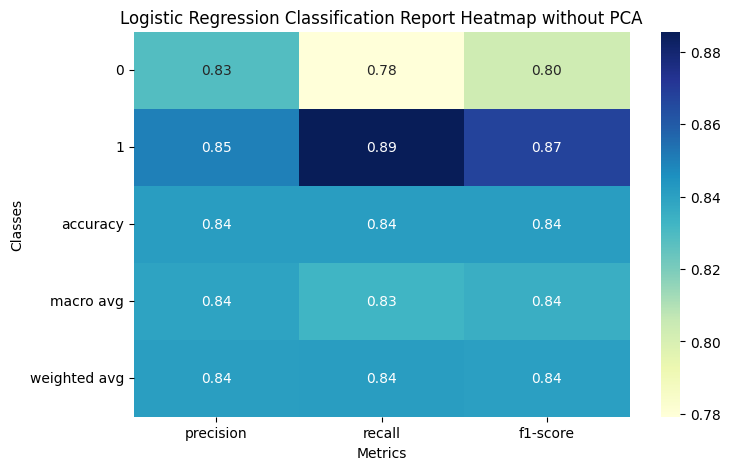

In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(report_df.iloc[:, :-1], annot=True, cmap='YlGnBu', fmt='.2f')  # exclude support column for better scaling

plt.title('Logistic Regression Classification Report Heatmap without PCA')
plt.ylabel('Classes')
plt.xlabel('Metrics')
plt.show()

###XGBoost

In [ ]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)

y_pred = xgb_model.predict(X_test_scaled)

Accuracy

In [ ]:
xgb_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", xgb_accuracy)

Accuracy: 0.8356790568988332


Confusion Matrix

In [ ]:
xgb_cm = confusion_matrix(y_test, y_pred)
print('confusion matrix:')
print(xgb_cm)

confusion matrix:
[[2688  759]
 [ 607 4259]]


Visualize Confusion matrix

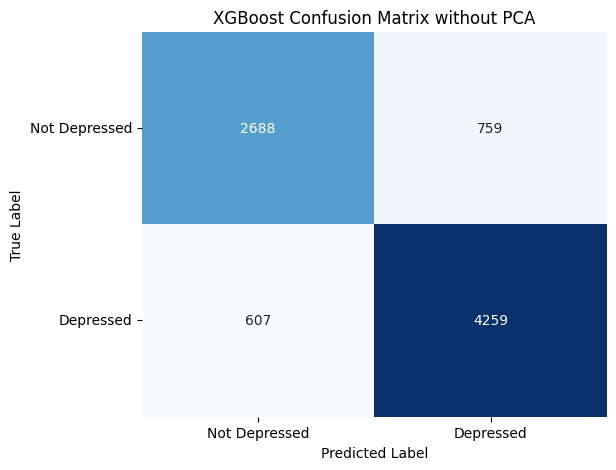

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('XGBoost Confusion Matrix without PCA')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0.5, 1.5], ['Not Depressed', 'Depressed'])
plt.yticks([0.5, 1.5], ['Not Depressed', 'Depressed'], rotation=0)

plt.show()

Classification Report

In [ ]:
xgb_class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(xgb_class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      3447
           1       0.85      0.88      0.86      4866

    accuracy                           0.84      8313
   macro avg       0.83      0.83      0.83      8313
weighted avg       0.84      0.84      0.84      8313



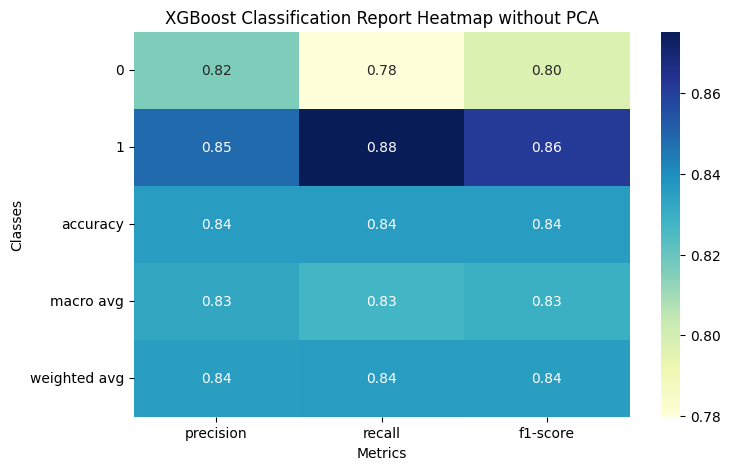

In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(report_df.iloc[:, :-1], annot=True, cmap='YlGnBu', fmt='.2f')  # exclude support column for better scaling

plt.title('XGBoost Classification Report Heatmap without PCA')
plt.ylabel('Classes')
plt.xlabel('Metrics')
plt.show()

###Random Forest

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)

Accuracy

In [ ]:
rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", rf_accuracy)

Accuracy: 0.8385661012871406


Confusion Matrix

In [ ]:
rf_cm = confusion_matrix(y_test, y_pred)
print('confusion matrix:')
print(rf_cm)

confusion matrix:
[[2667  780]
 [ 562 4304]]


Visualizing Confusion Matrix

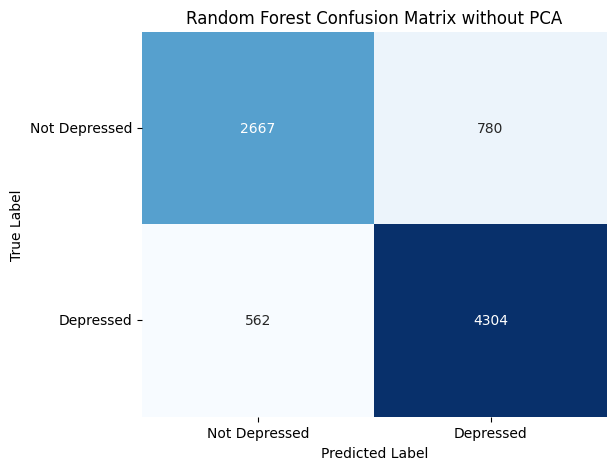

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Random Forest Confusion Matrix without PCA')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0.5, 1.5], ['Not Depressed', 'Depressed'])
plt.yticks([0.5, 1.5], ['Not Depressed', 'Depressed'], rotation=0)

plt.show()

Classification Report

In [ ]:
rf_class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(rf_class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      3447
           1       0.85      0.88      0.87      4866

    accuracy                           0.84      8313
   macro avg       0.84      0.83      0.83      8313
weighted avg       0.84      0.84      0.84      8313



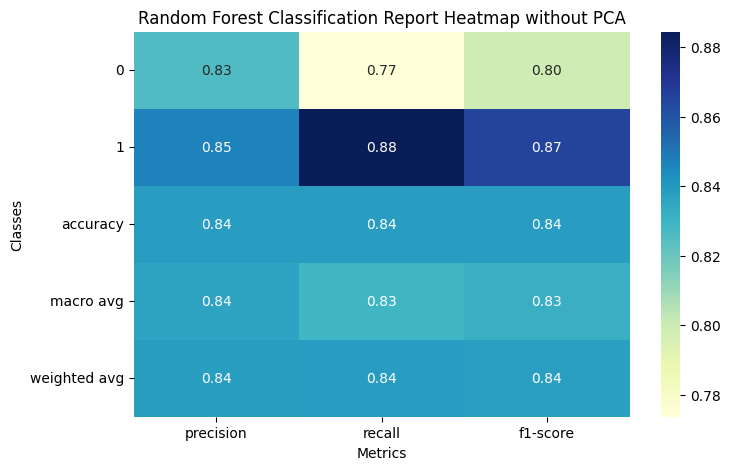

In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(report_df.iloc[:, :-1], annot=True, cmap='YlGnBu', fmt='.2f')  # exclude support column for better scaling

plt.title('Random Forest Classification Report Heatmap without PCA')
plt.ylabel('Classes')
plt.xlabel('Metrics')
plt.show()

###SVM (Support Vector Machine)

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
svm_accuracy = 0
svm_kernel = None
best_y_pred = None

for kernel in kernels:
    svm_model = SVC(kernel = kernel)
    svm_model.fit(X_train_scaled, y_train)

    y_pred = svm_model.predict(X_test_scaled)

    current_accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {kernel}: {current_accuracy}")
    if current_accuracy > svm_accuracy:
        svm_accuracy = current_accuracy
        svm_kernel = kernel
        best_y_pred = y_pred

Accuracy for linear: 0.8430169613857813
Accuracy for poly: 0.8333934800914231
Accuracy for rbf: 0.8374834596415254
Accuracy for sigmoid: 0.7487068447010706


Accuracy

In [ ]:
print("kernel:", svm_kernel)
print("Accuracy:", svm_accuracy)

kernel: linear
Accuracy: 0.8430169613857813


Confusion Matrix

In [ ]:
svm_cm = confusion_matrix(y_test, best_y_pred)
print('confusion matrix:')
print(svm_cm)

confusion matrix:
[[2684  763]
 [ 542 4324]]


VIsualize Confusion Matrix

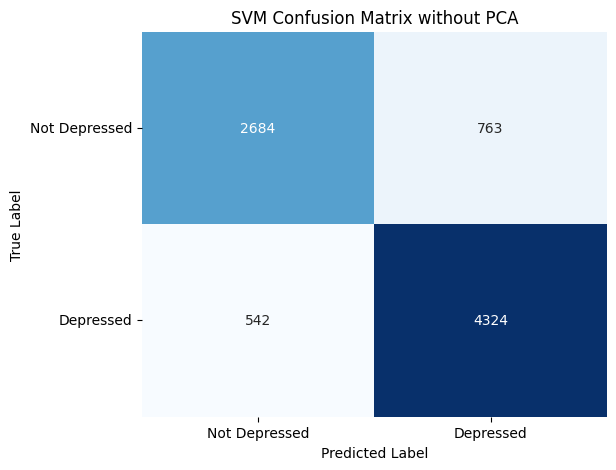

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('SVM Confusion Matrix without PCA')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0.5, 1.5], ['Not Depressed', 'Depressed'])
plt.yticks([0.5, 1.5], ['Not Depressed', 'Depressed'], rotation=0)

plt.show()

Classification Report

In [ ]:
svm_class_report = classification_report(y_test, best_y_pred)
print("\nClassification Report:")
print(svm_class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      3447
           1       0.85      0.89      0.87      4866

    accuracy                           0.84      8313
   macro avg       0.84      0.83      0.84      8313
weighted avg       0.84      0.84      0.84      8313



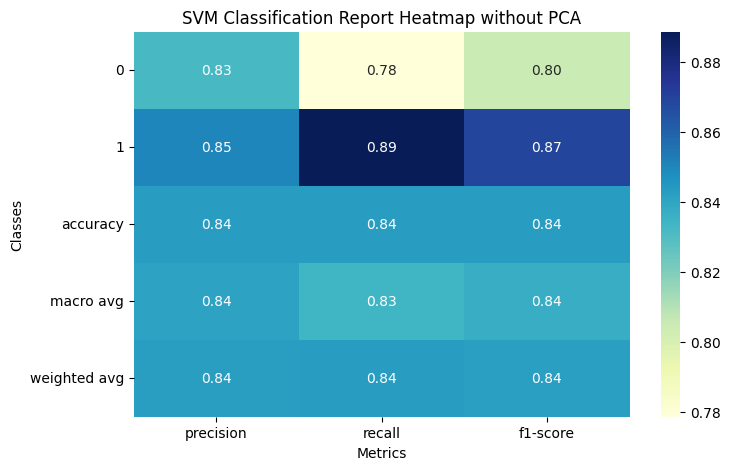

In [ ]:
report = classification_report(y_test, best_y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(report_df.iloc[:, :-1], annot=True, cmap='YlGnBu', fmt='.2f')  # exclude support column for better scaling

plt.title('SVM Classification Report Heatmap without PCA')
plt.ylabel('Classes')
plt.xlabel('Metrics')
plt.show()


### KNN

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

Accuracy

In [ ]:
# accuracy
knn_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", knn_accuracy)

Accuracy: 0.7745699506796584


confusion matrix


In [ ]:
# confusion matrix
knn_cm = confusion_matrix(y_test, y_pred)
print('confusion matrix:')
print(knn_cm)

confusion matrix:
[[2267 1180]
 [ 694 4172]]


Visualize Confusion Matrix

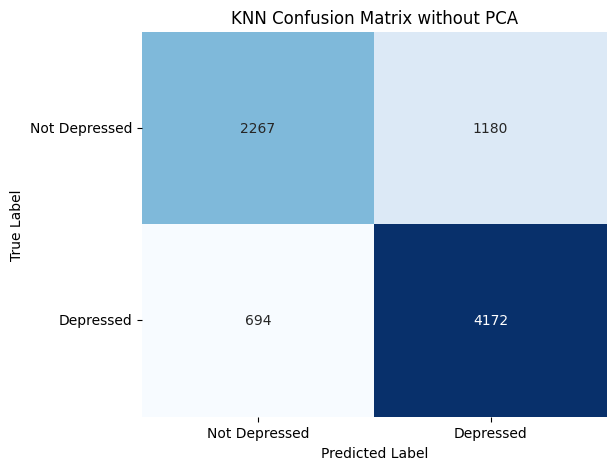

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('KNN Confusion Matrix without PCA')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0.5, 1.5], ['Not Depressed', 'Depressed'])
plt.yticks([0.5, 1.5], ['Not Depressed', 'Depressed'], rotation=0)

plt.show()

Classification report

In [ ]:
knn_class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(knn_class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.66      0.71      3447
           1       0.78      0.86      0.82      4866

    accuracy                           0.77      8313
   macro avg       0.77      0.76      0.76      8313
weighted avg       0.77      0.77      0.77      8313



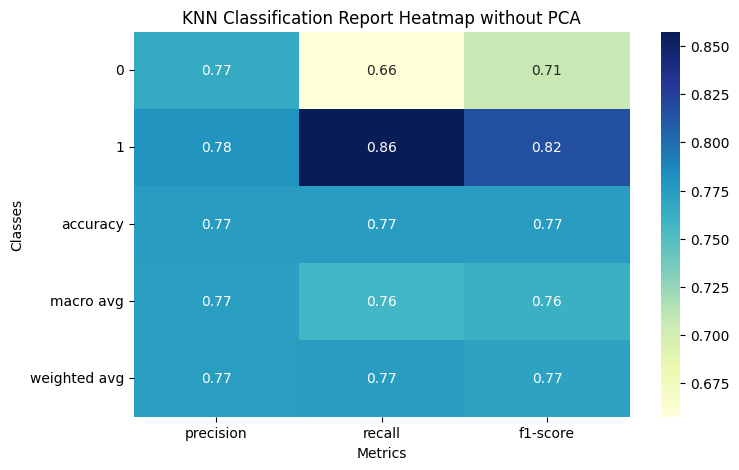

In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(report_df.iloc[:, :-1], annot=True, cmap='YlGnBu', fmt='.2f')  # exclude support column for better scaling

plt.title('KNN Classification Report Heatmap without PCA')
plt.ylabel('Classes')
plt.xlabel('Metrics')
plt.show()

### Decision Tree

In [ ]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_scaled, y_train)

y_pred = tree_model.predict(X_test_scaled)

Accuracy

In [ ]:
# accuarcy
tree_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', tree_accuracy)

Accuracy: 0.7703596776133766


Confusion matrix

In [ ]:
# confusion matrix
tree_cm = confusion_matrix(y_test, y_pred)
print('confusion matrix:')
print(tree_cm)

confusion matrix:
[[2511  936]
 [ 973 3893]]


Visualize Confusion Matrix

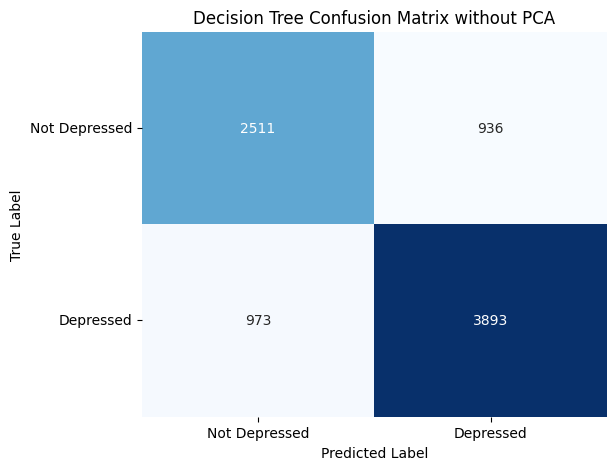

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(tree_cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Decision Tree Confusion Matrix without PCA')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0.5, 1.5], ['Not Depressed', 'Depressed'])
plt.yticks([0.5, 1.5], ['Not Depressed', 'Depressed'], rotation=0)

plt.show()

Classification report

In [ ]:
tree_class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(tree_class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.73      0.72      3447
           1       0.81      0.80      0.80      4866

    accuracy                           0.77      8313
   macro avg       0.76      0.76      0.76      8313
weighted avg       0.77      0.77      0.77      8313



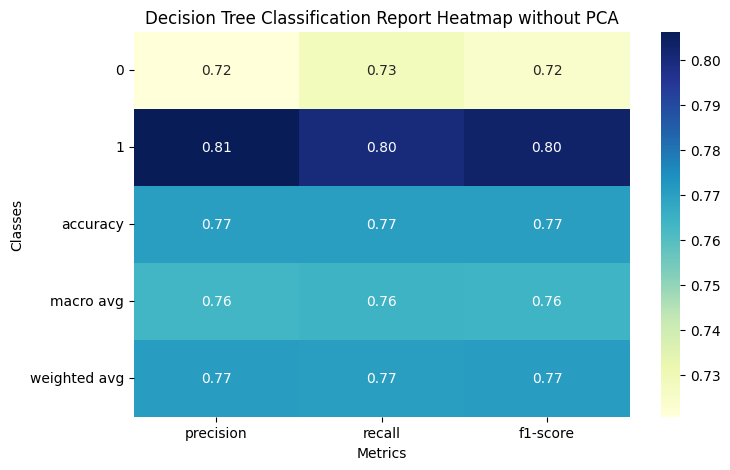

In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(report_df.iloc[:, :-1], annot=True, cmap='YlGnBu', fmt='.2f')  # exclude support column for better scaling

plt.title('Decision Tree Classification Report Heatmap without PCA')
plt.ylabel('Classes')
plt.xlabel('Metrics')
plt.show()

### Naive Bayes

In [ ]:
gnb_model = GaussianNB()
gnb_model.fit(x_train, y_train)

y_pred = gnb_model.predict(x_test)

Accuracy

In [ ]:
# accuarcy
gnb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', gnb_accuracy)

Accuracy: 0.6469385300132323


Confusion matrix

In [ ]:
# confusion matrix
gnb_cm = confusion_matrix(y_test, y_pred)
print('confusion matrix:')
print(gnb_cm)

confusion matrix:
[[3107  340]
 [2595 2271]]


Visualize Confusion Matrix

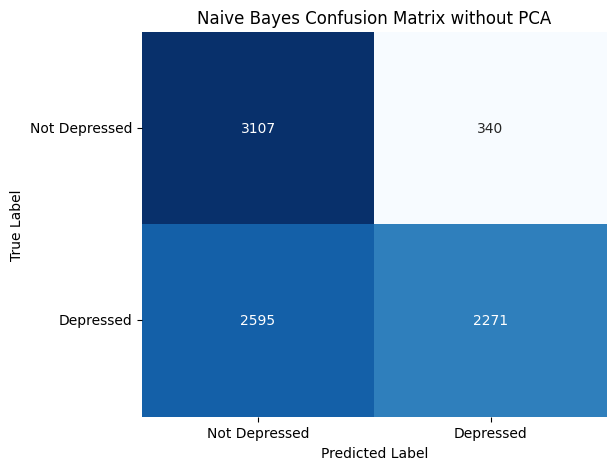

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(gnb_cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Naive Bayes Confusion Matrix without PCA')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0.5, 1.5], ['Not Depressed', 'Depressed'])
plt.yticks([0.5, 1.5], ['Not Depressed', 'Depressed'], rotation=0)

plt.show()

Classification report

In [ ]:
gnb_class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(gnb_class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.90      0.68      3447
           1       0.87      0.47      0.61      4866

    accuracy                           0.65      8313
   macro avg       0.71      0.68      0.64      8313
weighted avg       0.74      0.65      0.64      8313



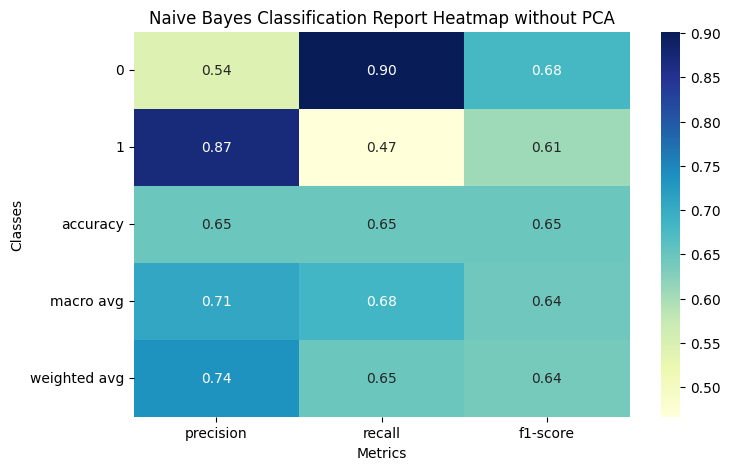

In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(report_df.iloc[:, :-1], annot=True, cmap='YlGnBu', fmt='.2f')  # exclude support column for better scaling

plt.title('Naive Bayes Classification Report Heatmap without PCA')
plt.ylabel('Classes')
plt.xlabel('Metrics')
plt.show()

### Bar plot

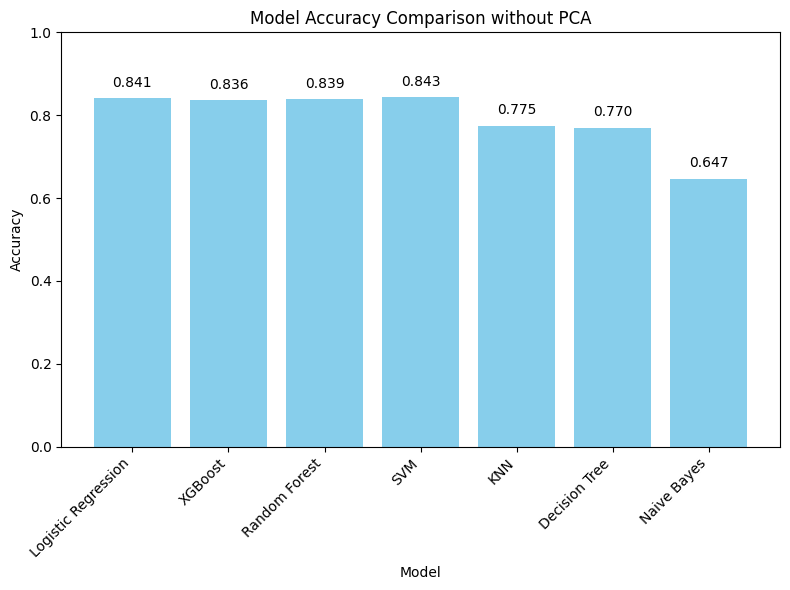

In [ ]:
accuracy_data = {
    'Model': ['Logistic Regression', 'XGBoost', 'Random Forest', 'SVM', 'KNN', 'Decision Tree', 'Naive Bayes'],
    'Accuracy': [logistic_accuracy, xgb_accuracy, rf_accuracy, svm_accuracy, knn_accuracy, tree_accuracy, gnb_accuracy]
}

accuracy_df = pd.DataFrame(accuracy_data)

# Plotting the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(accuracy_df['Model'], accuracy_df['Accuracy'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison without PCA')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Adding accuracy labels inside the bars
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar (accuracy value)
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f'{yval:.3f}', ha='center', va='bottom', fontsize=10)

plt.show()

##Working with PCA

###Apply PCA to reduce dimensionality

In [ ]:
pca = PCA(n_components = 0.75)

# Using the already scaled dataset
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

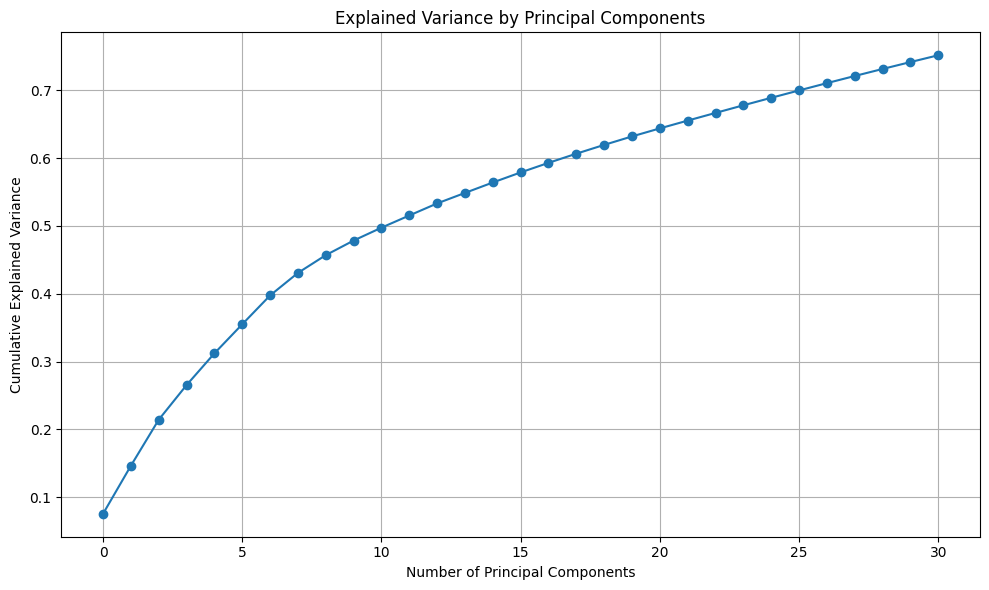

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.tight_layout()
plt.show()

##Applying ML into PCA-reduced dataset

###Logistic Regression

In [ ]:
logistic_model_pca = LogisticRegression()
logistic_model_pca.fit(X_train_pca, y_train)

y_pred_pca = logistic_model_pca.predict(X_test_pca)

Accuracy

In [ ]:
logistic_accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy:", logistic_accuracy_pca)

Accuracy: 0.8378443401900637


Confusion Matrix

In [ ]:
logistic_cm_pca = confusion_matrix(y_test, y_pred_pca)
print('confusion matrix:')
print(logistic_cm_pca)

confusion matrix:
[[2660  787]
 [ 561 4305]]


Visualize Confusion Matrix

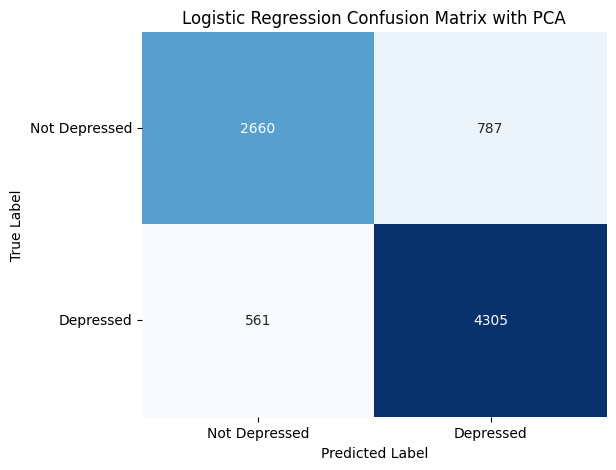

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(logistic_cm_pca, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Logistic Regression Confusion Matrix with PCA')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0.5, 1.5], ['Not Depressed', 'Depressed'])
plt.yticks([0.5, 1.5], ['Not Depressed', 'Depressed'], rotation=0)

plt.show()

Classification Report

In [ ]:
logistic_class_report_pca = classification_report(y_test, y_pred_pca)
print("\nClassification Report:")
print(logistic_class_report_pca)


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      3447
           1       0.85      0.88      0.86      4866

    accuracy                           0.84      8313
   macro avg       0.84      0.83      0.83      8313
weighted avg       0.84      0.84      0.84      8313



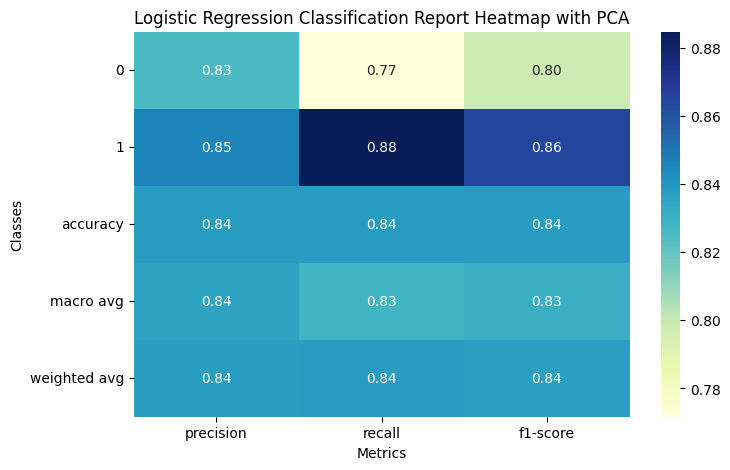

In [ ]:
report = classification_report(y_test, y_pred_pca, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(report_df.iloc[:, :-1], annot=True, cmap='YlGnBu', fmt='.2f')  # exclude support column for better scaling

plt.title('Logistic Regression Classification Report Heatmap with PCA')
plt.ylabel('Classes')
plt.xlabel('Metrics')
plt.show()

###XGBoost

In [ ]:
xgb_model_pca = xgb.XGBClassifier()
xgb_model_pca.fit(X_train_pca, y_train)

y_pred_pca = xgb_model_pca.predict(X_test_pca)

Accuracy

In [ ]:
xgb_accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy:", xgb_accuracy_pca)

Accuracy: 0.8262961626368339


Confusion Matrix

In [ ]:
xgb_cm_pca = confusion_matrix(y_test, y_pred_pca)
print('confusion matrix:')
print(xgb_cm_pca)

confusion matrix:
[[2647  800]
 [ 644 4222]]


Visualize Confusion Matrix

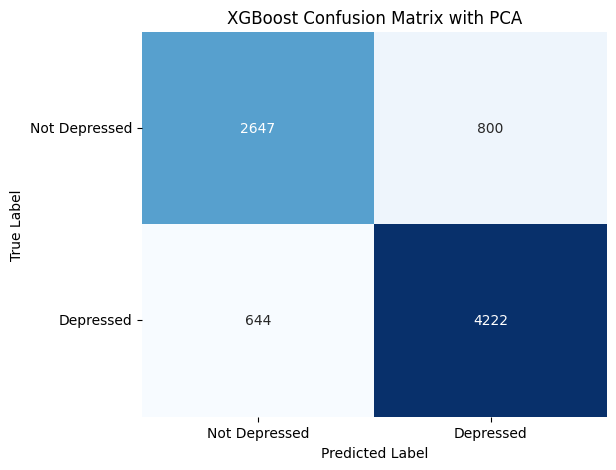

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(xgb_cm_pca, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('XGBoost Confusion Matrix with PCA')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0.5, 1.5], ['Not Depressed', 'Depressed'])
plt.yticks([0.5, 1.5], ['Not Depressed', 'Depressed'], rotation=0)

plt.show()

Classification Report

In [ ]:
xgb_class_report_pca = classification_report(y_test, y_pred_pca)
print("\nClassification Report:")
print(xgb_class_report_pca)


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.79      3447
           1       0.84      0.87      0.85      4866

    accuracy                           0.83      8313
   macro avg       0.82      0.82      0.82      8313
weighted avg       0.83      0.83      0.83      8313



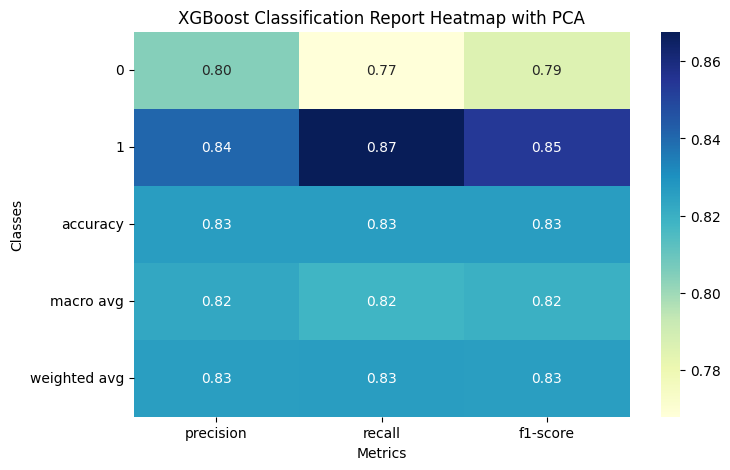

In [ ]:
report = classification_report(y_test, y_pred_pca, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(report_df.iloc[:, :-1], annot=True, cmap='YlGnBu', fmt='.2f')  # exclude support column for better scaling

plt.title('XGBoost Classification Report Heatmap with PCA')
plt.ylabel('Classes')
plt.xlabel('Metrics')
plt.show()

###Random Forest

In [ ]:
rf_model_pca = RandomForestClassifier()
rf_model_pca.fit(X_train_pca, y_train)

y_pred_pca = rf_model_pca.predict(X_test_pca)

Accuracy

In [ ]:
rf_accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy:", rf_accuracy_pca)

Accuracy: 0.8315890773487309


Confusion Matrix

In [ ]:
rf_cm_pca = confusion_matrix(y_test, y_pred_pca)
print('confusion matrix:')
print(rf_cm_pca)

confusion matrix:
[[2632  815]
 [ 585 4281]]


Visualize Confusion Matrix

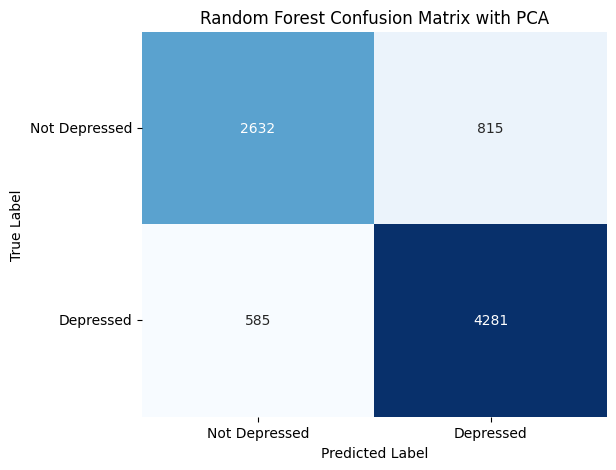

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(rf_cm_pca, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Random Forest Confusion Matrix with PCA')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0.5, 1.5], ['Not Depressed', 'Depressed'])
plt.yticks([0.5, 1.5], ['Not Depressed', 'Depressed'], rotation=0)

plt.show()

Classification Report

In [ ]:
rf_class_report_pca = classification_report(y_test, y_pred_pca)
print("\nClassification Report:")
print(rf_class_report_pca)


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79      3447
           1       0.84      0.88      0.86      4866

    accuracy                           0.83      8313
   macro avg       0.83      0.82      0.82      8313
weighted avg       0.83      0.83      0.83      8313



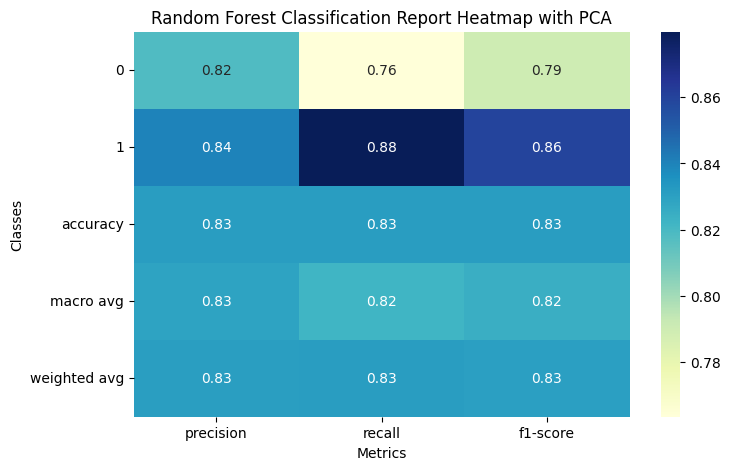

In [ ]:
report = classification_report(y_test, y_pred_pca, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(report_df.iloc[:, :-1], annot=True, cmap='YlGnBu', fmt='.2f')  # exclude support column for better scaling

plt.title('Random Forest Classification Report Heatmap with PCA')
plt.ylabel('Classes')
plt.xlabel('Metrics')
plt.show()

###SVM (Support Vector Machine)

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
svm_accuracy_pca = 0
svm_kernel_pca = None
best_y_pca_pred = None

for kernel in kernels:
    svm_model = SVC(kernel = kernel)
    svm_model.fit(X_train_pca, y_train)

    y_pred_pca = svm_model.predict(X_test_pca)

    current_accuracy = accuracy_score(y_test, y_pred_pca)
    print(f"Accuracy for {kernel}: {current_accuracy}")
    if current_accuracy > svm_accuracy_pca:
        svm_accuracy_pca = current_accuracy
        svm_kernel_pca = kernel
        best_y_pca_pred = y_pred

Accuracy for linear: 0.8379646337062432
Accuracy for poly: 0.8291832070251414
Accuracy for rbf: 0.8349572958017563
Accuracy for sigmoid: 0.7736076025502225


Accuracy

In [ ]:
print("kernel:", svm_kernel_pca)
print("Accuracy:", svm_accuracy_pca)

kernel: linear
Accuracy: 0.8379646337062432


Confusion Matrix

In [ ]:
svm_cm_pca = confusion_matrix(y_test, best_y_pca_pred)
print('confusion matrix:')
print(svm_cm_pca)

confusion matrix:
[[3107  340]
 [2595 2271]]


Visualize Confusion Matrix

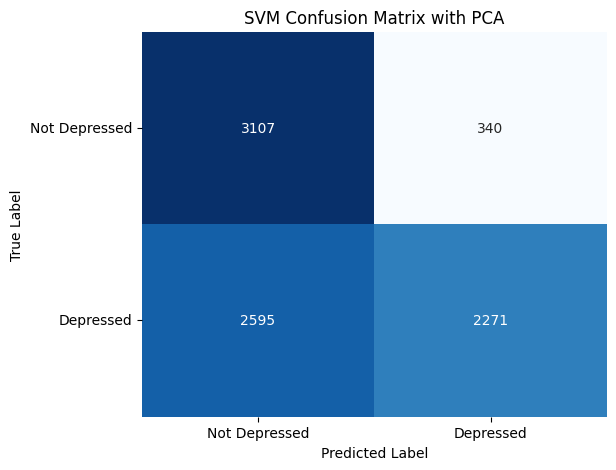

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(svm_cm_pca, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('SVM Confusion Matrix with PCA')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0.5, 1.5], ['Not Depressed', 'Depressed'])
plt.yticks([0.5, 1.5], ['Not Depressed', 'Depressed'], rotation=0)

plt.show()

Classification Report

In [ ]:
svm_pca_class_report = classification_report(y_test, best_y_pca_pred)
print("\nClassification Report:")
print(svm_pca_class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.90      0.68      3447
           1       0.87      0.47      0.61      4866

    accuracy                           0.65      8313
   macro avg       0.71      0.68      0.64      8313
weighted avg       0.74      0.65      0.64      8313



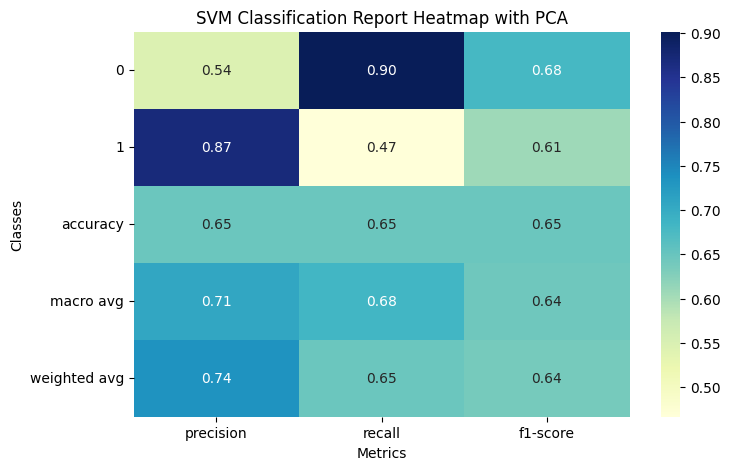

In [ ]:
report = classification_report(y_test, best_y_pca_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(report_df.iloc[:, :-1], annot=True, cmap='YlGnBu', fmt='.2f')  # exclude support column for better scaling

plt.title('SVM Classification Report Heatmap with PCA')
plt.ylabel('Classes')
plt.xlabel('Metrics')
plt.show()

###KNN

In [ ]:
knn_model_pca = KNeighborsClassifier()
knn_model_pca.fit(X_train_pca, y_train)

y_pred_pca = knn_model_pca.predict(X_test_pca)

Accuracy

In [ ]:
knn_accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy:", knn_accuracy_pca)

Accuracy: 0.7945386743654517


Confusion Matrix

In [ ]:
knn_cm_pca = confusion_matrix(y_test, y_pred_pca)
print('confusion matrix:')
print(knn_cm_pca)

confusion matrix:
[[2444 1003]
 [ 705 4161]]


Visualize Confusion Matrix

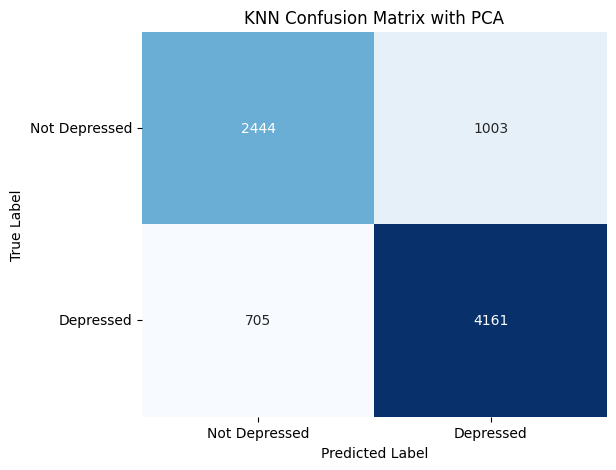

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(knn_cm_pca, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('KNN Confusion Matrix with PCA')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0.5, 1.5], ['Not Depressed', 'Depressed'])
plt.yticks([0.5, 1.5], ['Not Depressed', 'Depressed'], rotation=0)

plt.show()

Classification Report

In [ ]:
knn_class_report_pca = classification_report(y_test, y_pred_pca)
print("\nClassification Report:")
print(knn_class_report_pca)


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.71      0.74      3447
           1       0.81      0.86      0.83      4866

    accuracy                           0.79      8313
   macro avg       0.79      0.78      0.79      8313
weighted avg       0.79      0.79      0.79      8313



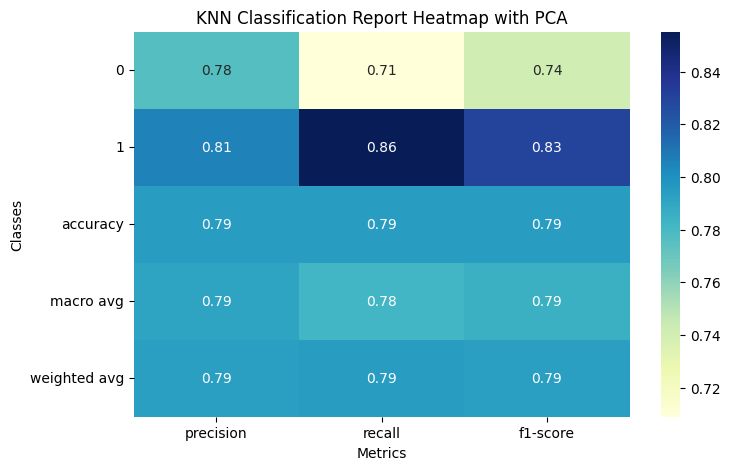

In [ ]:
report = classification_report(y_test, y_pred_pca, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(report_df.iloc[:, :-1], annot=True, cmap='YlGnBu', fmt='.2f')  # exclude support column for better scaling

plt.title('KNN Classification Report Heatmap with PCA')
plt.ylabel('Classes')
plt.xlabel('Metrics')
plt.show()

###Decision Tree

In [ ]:
tree_model_pca = DecisionTreeClassifier()
tree_model_pca.fit(X_train_pca, y_train)

y_pred_pca = tree_model_pca.predict(X_test_pca)

Accuracy

In [ ]:
tree_accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy:", tree_accuracy_pca)

Accuracy: 0.7704799711295561


Confusion Matrix

In [ ]:
tree_cm_pca = confusion_matrix(y_test, y_pred_pca)
print('confusion matrix:')
print(tree_cm_pca)

confusion matrix:
[[2506  941]
 [ 967 3899]]


Visualize Confusion Matrix

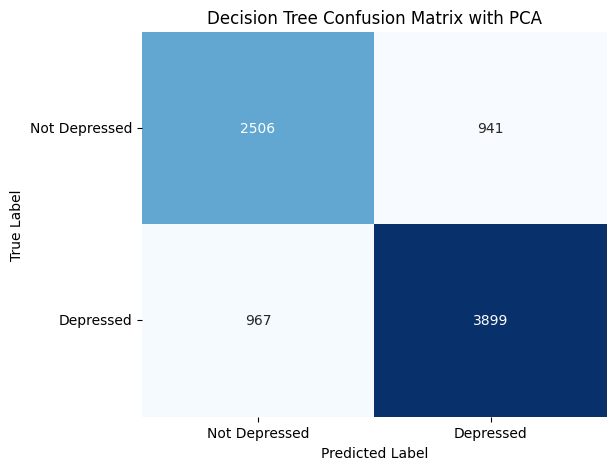

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(tree_cm_pca, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Decision Tree Confusion Matrix with PCA')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0.5, 1.5], ['Not Depressed', 'Depressed'])
plt.yticks([0.5, 1.5], ['Not Depressed', 'Depressed'], rotation=0)

plt.show()

Classification Report

In [ ]:
tree_class_report_pca = classification_report(y_test, y_pred_pca)
print("\nClassification Report:")
print(tree_class_report_pca)


Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.73      0.72      3447
           1       0.81      0.80      0.80      4866

    accuracy                           0.77      8313
   macro avg       0.76      0.76      0.76      8313
weighted avg       0.77      0.77      0.77      8313



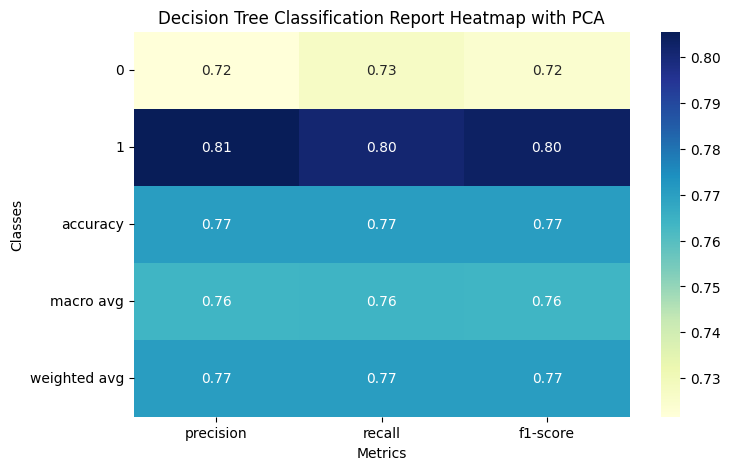

In [ ]:
report = classification_report(y_test, y_pred_pca, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(report_df.iloc[:, :-1], annot=True, cmap='YlGnBu', fmt='.2f')  # exclude support column for better scaling

plt.title('Decision Tree Classification Report Heatmap with PCA')
plt.ylabel('Classes')
plt.xlabel('Metrics')
plt.show()

###Naive Bayes

In [ ]:
gnb_model_pca = DecisionTreeClassifier()
gnb_model_pca.fit(X_train_pca, y_train)

y_pred_pca = gnb_model_pca.predict(X_test_pca)

Accuracy

In [ ]:
gnb_accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy:", gnb_accuracy_pca)

Accuracy: 0.7695176230001203


Confusion Matrix

In [ ]:
gnb_cm_pca = confusion_matrix(y_test, y_pred_pca)
print('confusion matrix:')
print(gnb_cm_pca)

confusion matrix:
[[2491  956]
 [ 960 3906]]


Visualize Confusion Matrix

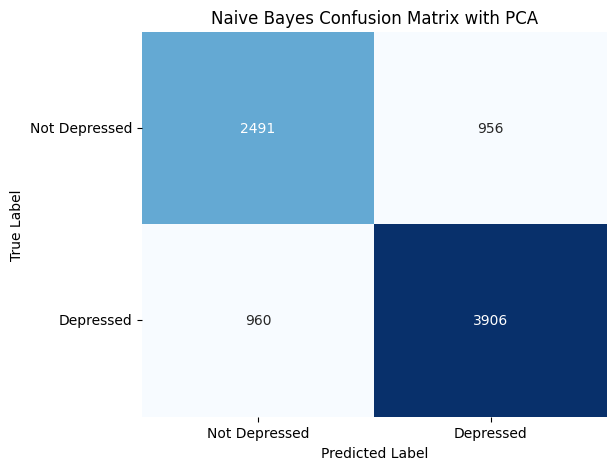

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(gnb_cm_pca, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Naive Bayes Confusion Matrix with PCA')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0.5, 1.5], ['Not Depressed', 'Depressed'])
plt.yticks([0.5, 1.5], ['Not Depressed', 'Depressed'], rotation=0)

plt.show()

Classification Report

In [ ]:
gnb_class_report_pca = classification_report(y_test, y_pred_pca)
print("\nClassification Report:")
print(gnb_class_report_pca)


Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      3447
           1       0.80      0.80      0.80      4866

    accuracy                           0.77      8313
   macro avg       0.76      0.76      0.76      8313
weighted avg       0.77      0.77      0.77      8313



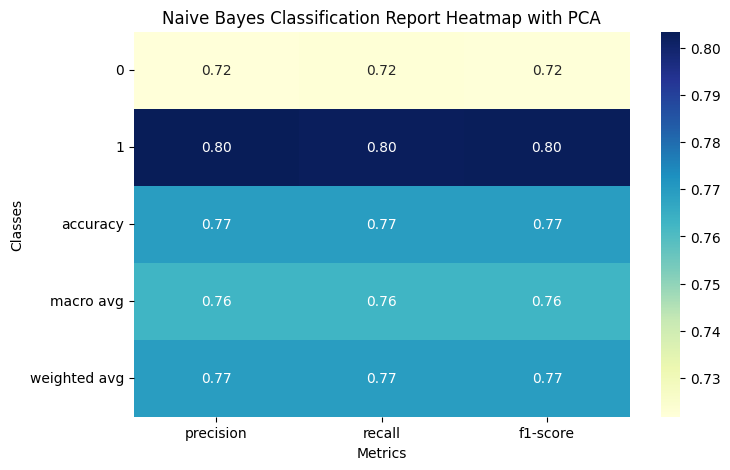

In [ ]:
report = classification_report(y_test, y_pred_pca, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(report_df.iloc[:, :-1], annot=True, cmap='YlGnBu', fmt='.2f')  # exclude support column for better scaling

plt.title('Naive Bayes Classification Report Heatmap with PCA')
plt.ylabel('Classes')
plt.xlabel('Metrics')
plt.show()

###Bar Plot

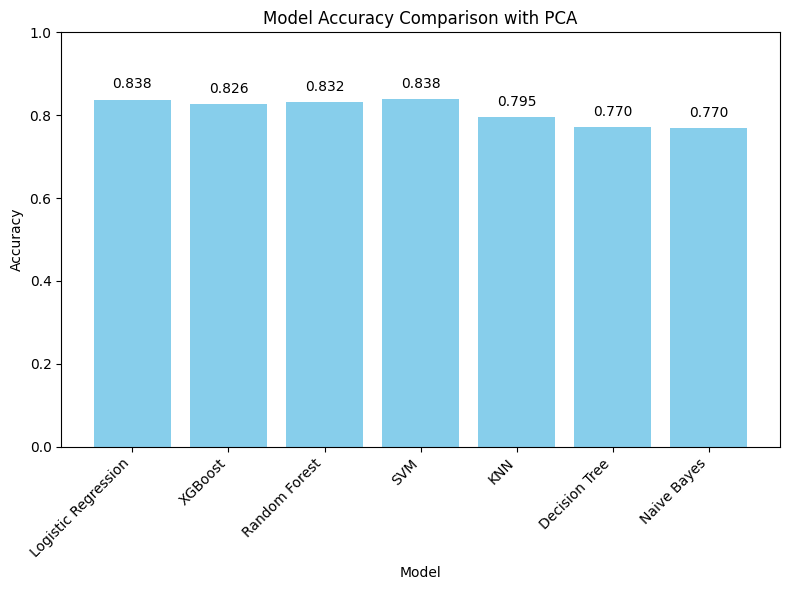

In [ ]:
accuracy_data = {
    'Model': ['Logistic Regression', 'XGBoost', 'Random Forest', 'SVM', 'KNN', 'Decision Tree', 'Naive Bayes'],
    'Accuracy': [logistic_accuracy_pca, xgb_accuracy_pca, rf_accuracy_pca, svm_accuracy_pca, knn_accuracy_pca, tree_accuracy_pca, gnb_accuracy_pca]
}

accuracy_df = pd.DataFrame(accuracy_data)

# Plotting the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(accuracy_df['Model'], accuracy_df['Accuracy'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison with PCA')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Adding accuracy labels inside the bars
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar (accuracy value)
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f'{yval:.3f}', ha='center', va='bottom', fontsize=10)

plt.show()